In [1]:
import pandas as pd
import numpy as np

import utils

import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_rows', 500)

# Ravel Nugent Score

## Refseq OTU

In [2]:
task = 'Ravel Nugent Low/High Refseq OTU'
folder = 'ravel-nugentv2'

In [3]:
num_features = 588
weights = (1, -1)

In [4]:
df1 = pd.read_csv('./'+folder+'/ravel_nugent_cat_refseq_exp1/best_test.csv', sep=';') # NoRel+NoCLR
df2 = pd.read_csv('./'+folder+'/ravel_nugent_cat_refseq_exp2/best_test.csv', sep=';') # Rel+NoCLR
df3 = pd.read_csv('./'+folder+'/ravel_nugent_cat_refseq_exp3/best_test.csv', sep=';') # NoRel+CLR

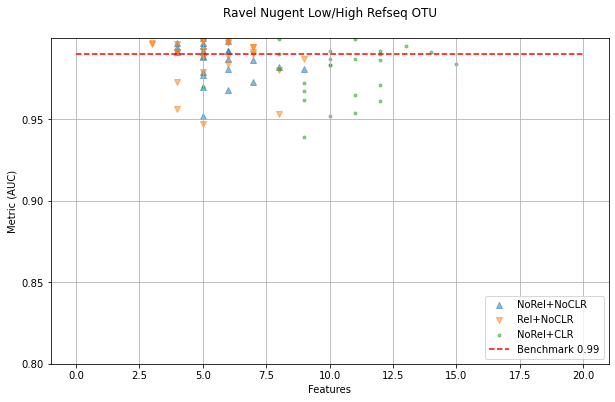

In [5]:
utils.plot(df1, df2, df3, 'num_genes', 'metric', num_features, weights, title=task, subtitle='', baseline=0.99, filename='./plotsv2/ravel_nugent_refseq_otu.png', xmax=20, ylim=(0.8, 1))

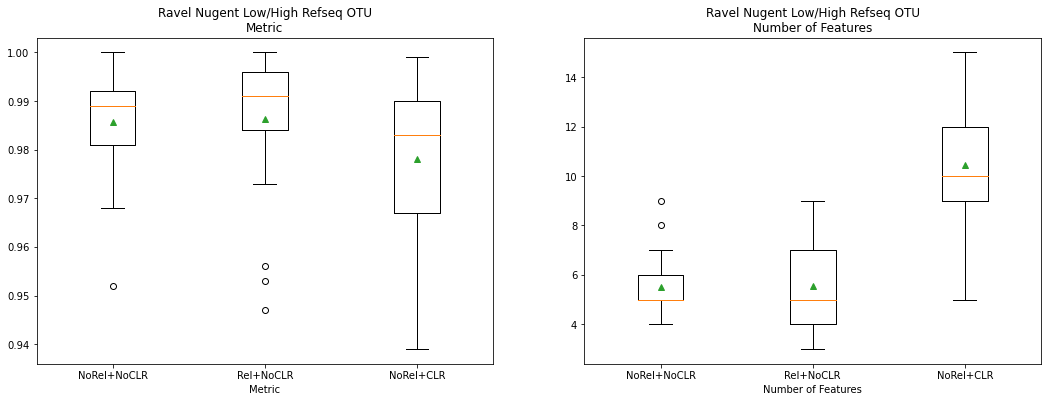

In [6]:
utils.boxplot(df1, df2, df3, num_features, weights, task, filename='./plotsv2/ravel_nugent_boxplot_refseq_otu.png')

In [7]:
d = {
    'NoRel+NoCLR': utils.all(df1, num_features, weights).sort_values('metric', ascending=False),
    'Rel+NoCLR': utils.all(df2, num_features, weights).sort_values('metric', ascending=False),
    'NoRel+CLR': utils.all(df3, num_features, weights).sort_values('metric', ascending=False)
}

---

In [8]:
import sys 
sys.path.append('../src')

import dataset
import config
import run_best_features
from tasks import *

import ast

In [9]:
n = 100

In [10]:
# Experiment 1

config.DATA_PARAMS['task'] = vaginal['ravel_nugent_category_refseq_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = ''

data1 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'NoRel+NoCLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data1, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_refseq_'+experiment+'.tsv', sep='\t')

Final dataset shape: (342, 588)


In [11]:
# Experiment 2

config.DATA_PARAMS['task'] = vaginal['ravel_nugent_category_refseq_otu']
config.DATA_PARAMS['relative_abundance'] = True
config.DATA_PARAMS['comp_alg'] = ''

data2 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'Rel+NoCLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data2, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_refseq_'+experiment+'.tsv', sep='\t')

Final dataset shape: (342, 588)


In [12]:
# Experiment 3

config.DATA_PARAMS['task'] = vaginal['ravel_nugent_category_refseq_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = 'clr'

data3 = dataset.ClassificationDataset(**config.DATA_PARAMS)

experiment = 'NoRel+CLR'
result = d[experiment].apply(lambda x: run_best_features.run(config, data3, ast.literal_eval(x['mask']), n), axis=1)
utils.update_experiment_stats(d[experiment], result)
d[experiment].to_csv('./'+folder+'/stats_refseq_'+experiment+'.tsv', sep='\t')

Final dataset shape: (342, 588)


In [13]:
d['NoRel+NoCLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
13,8,5,0.977,0.969,"[128, 157, 212, 226, 490]",0.968,0.968,"[0.996, 0.972, 0.955, 0.99, 0.998, 0.985, 0.98...",0.986,0.946,1.0,0.012
39,21,5,0.979,0.971,"[157, 158, 159, 326, 490]",0.970,0.970,"[0.995, 0.967, 0.995, 0.954, 0.987, 0.987, 0.9...",0.986,0.940,1.0,0.012
15,10,5,0.989,0.981,"[119, 159, 212, 326, 490]",0.980,0.980,"[0.985, 0.985, 0.981, 0.984, 0.993, 0.954, 0.9...",0.985,0.941,1.0,0.013
20,14,6,0.987,0.977,"[84, 157, 159, 311, 326, 490]",0.977,0.977,"[0.976, 0.963, 1.0, 0.99, 0.976, 0.99, 0.974, ...",0.984,0.918,1.0,0.014
1,1,9,0.981,0.966,"[119, 157, 160, 211, 212, 226, 311, 490, 537]",0.966,0.966,"[0.996, 0.981, 0.984, 0.983, 1.0, 0.982, 0.987...",0.984,0.929,1.0,0.014


In [14]:
d['Rel+NoCLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
1,1,4,0.996,0.989,"[157, 159, 326, 490]",0.989,0.989,"[0.959, 0.997, 0.992, 0.994, 0.987, 0.963, 0.9...",0.984,0.932,1.000,0.013
2,2,6,0.998,0.988,"[157, 159, 196, 226, 459, 490]",0.988,0.988,"[0.977, 0.995, 0.996, 0.991, 0.996, 0.972, 0.9...",0.983,0.904,0.999,0.016
4,3,6,1.000,0.990,"[159, 168, 211, 226, 326, 490]",0.990,0.990,"[0.994, 0.97, 0.996, 0.983, 0.996, 0.975, 0.97...",0.982,0.926,1.000,0.014
66,24,8,0.980,0.966,"[34, 107, 157, 159, 367, 445, 459, 490]",0.966,0.966,"[0.963, 0.987, 0.992, 0.986, 0.998, 0.994, 0.9...",0.981,0.935,0.999,0.015
60,22,5,0.988,0.980,"[128, 159, 226, 459, 490]",0.979,0.979,"[0.986, 0.984, 0.992, 0.986, 0.973, 0.988, 0.9...",0.981,0.893,1.000,0.017


In [15]:
d['NoRel+CLR'].sort_values('avg_n', ascending=False).head()

,search_id,num_genes,metric,mo_fitness,mask,adj_mo_fitness,adj_mo_fitness|max,raw_n,avg_n,min_n,max_n,std_n
34,21,12,0.986,0.966,"[61, 108, 119, 128, 159, 197, 226, 227, 326, 3...",0.966,0.966,"[0.983, 0.987, 0.989, 0.955, 0.994, 0.971, 0.9...",0.985,0.950,1.0,0.010
30,18,5,0.970,0.962,"[86, 157, 159, 326, 490]",0.961,0.961,"[0.984, 0.952, 0.992, 0.995, 0.984, 0.994, 0.9...",0.985,0.947,1.0,0.011
14,9,11,0.999,0.980,"[30, 72, 157, 190, 212, 214, 226, 377, 445, 45...",0.980,0.980,"[0.946, 0.999, 0.983, 0.995, 0.983, 0.985, 0.9...",0.984,0.931,1.0,0.015
1,1,12,0.971,0.951,"[0, 13, 71, 138, 157, 159, 238, 273, 326, 356,...",0.951,0.951,"[0.984, 0.994, 0.991, 0.987, 0.989, 0.998, 0.9...",0.984,0.922,1.0,0.013
35,22,12,0.990,0.970,"[22, 44, 83, 157, 159, 160, 168, 215, 236, 326...",0.970,0.970,"[0.997, 0.998, 0.991, 0.996, 0.986, 0.939, 0.9...",0.983,0.888,1.0,0.016


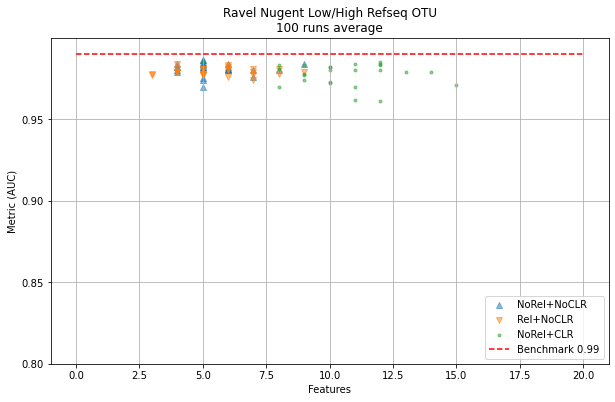

In [16]:
utils.plot(d['NoRel+NoCLR'], d['Rel+NoCLR'], d['NoRel+CLR'], 'num_genes', 'avg_n', num_features, weights, title=task, subtitle='100 runs average', baseline=0.99, filename='./plotsv2/ravel_nugent_refseq_otu_avg_n.png', xmax=20, ylim=(0.8, 1))

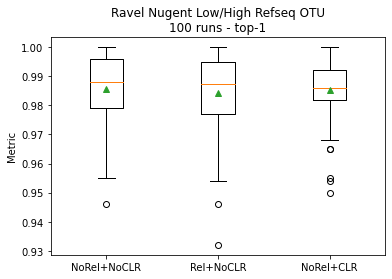

In [17]:
utils.boxplot_nruns_top1(d, title=task, subtitle='100 runs - top-1', filename='./plotsv2/ravel_nugent_boxplot_nruns_top1_refseq_otu.png')

---

In [10]:
import pandas as pd
import numpy as np

import sys 
sys.path.append('../src')

import utils

import dataset
import config
import run_best_features
from tasks import *

import ast

In [11]:
folder = 'ravel-nugentv2'
top_n = 5
n = 100

stats = {
    'NoRel+NoCLR': pd.read_csv('./'+folder+'/stats_refseq_NoRel+NoCLR.tsv', sep='\t'),
    'Rel+NoCLR': pd.read_csv('./'+folder+'/stats_refseq_Rel+NoCLR.tsv', sep='\t'),
    'NoRel+CLR': pd.read_csv('./'+folder+'/stats_refseq_NoRel+CLR.tsv', sep='\t'),
}

best_n = {
    'NoRel+NoCLR': [],
    'Rel+NoCLR': [],
    'NoRel+CLR': [],
}

best_n_features = {
    'NoRel+NoCLR': [],
    'Rel+NoCLR': [],
    'NoRel+CLR': [],
}

In [12]:
config.DATA_PARAMS['task'] = vaginal['ravel_nugent_category_refseq_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = ''
data1 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['NoRel+NoCLR'], i)
    score, fi = run_best_features.run(config, data1, top_n_features, n)
    best_n['NoRel+NoCLR'].append(np.round(np.mean(score), 3))
    best_n_features['NoRel+NoCLR'].append(len(top_n_features))

config.DATA_PARAMS['task'] = vaginal['ravel_nugent_category_refseq_otu']
config.DATA_PARAMS['relative_abundance'] = True
config.DATA_PARAMS['comp_alg'] = ''
data2 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['Rel+NoCLR'], i)
    score, f = run_best_features.run(config, data2, top_n_features, n)
    best_n['Rel+NoCLR'].append(np.round(np.mean(score), 3))
    best_n_features['Rel+NoCLR'].append(len(top_n_features))

config.DATA_PARAMS['task'] = vaginal['ravel_nugent_category_refseq_otu']
config.DATA_PARAMS['relative_abundance'] = False
config.DATA_PARAMS['comp_alg'] = 'clr'
data3 = dataset.ClassificationDataset(**config.DATA_PARAMS)

for i in range(1, top_n + 1):
    top_n_features = utils.get_top_n_features(stats['NoRel+CLR'], i)
    score, f = run_best_features.run(config, data3, top_n_features, n)
    best_n['NoRel+CLR'].append(np.round(np.mean(score), 3))
    best_n_features['NoRel+CLR'].append(len(top_n_features))

Final dataset shape: (342, 588)
Final dataset shape: (342, 588)
Final dataset shape: (342, 588)


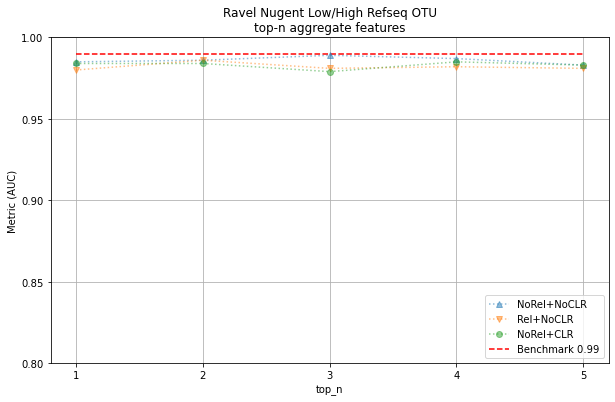

In [13]:
utils.plot_nruns_topn(best_n, title=task, subtitle='top-n aggregate features', baseline=0.99, filename='./plotsv2/ravel_nugent_nruns_topn_refseq_otu.png', xmax=(top_n-1), ylim=(0.8, 1.0001), top_n=top_n)

In [14]:
print(best_n)
print(best_n_features)

{'NoRel+NoCLR': [0.985, 0.986, 0.989, 0.987, 0.983], 'Rel+NoCLR': [0.98, 0.986, 0.981, 0.982, 0.981], 'NoRel+CLR': [0.984, 0.984, 0.979, 0.985, 0.983]}
{'NoRel+NoCLR': [5, 8, 9, 11, 14], 'Rel+NoCLR': [4, 7, 9, 13, 14], 'NoRel+CLR': [12, 14, 22, 30, 38]}


---

In [23]:
import importlib
importlib.reload(run_best_features)
importlib.reload(utils)

<module 'utils' from 'C:\\Users\\mikel\\Documents\\MScAI\\Sem4\\proposal-draft\\microbiome\\microbiome-analysis\\output\\utils.py'>

In [15]:
experiment = 'NoRel+NoCLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)
score, fi = run_best_features.run(config, data1, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
          -            0.0178       NR_036904.1_Staphylococcus_epidermidis_strain_Fussel_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0406       NR_104506.1_Gemella_asaccharolytica_strain_WAL_1945J_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0497       NR_041800.1_Lactobacillus_crispatus_strain_ATCC_33820_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0835       NR_043894.1_Prevotella_timonensis_strain_4401737_16S_ribosomal_RNA_gene__partial_sequence
          -            0.093        NR_118342.1_Sneathia_sanguinegens_strain_CCUG_41628_16S_ribosomal_RNA_gene__complete_sequence
          -            0.1343       NR_041796.1_Lactobacillus_vaginalis_strain_ATCC_49540_16S_ribosomal_RNA_gene__partial_sequence
          -            0.2314       NR_113356.1_Dialister_micraerophilus_strain_JCM_17567_16S_ribosomal_RNA_gene__partial_sequence
          -            0.3416       NR_118377.

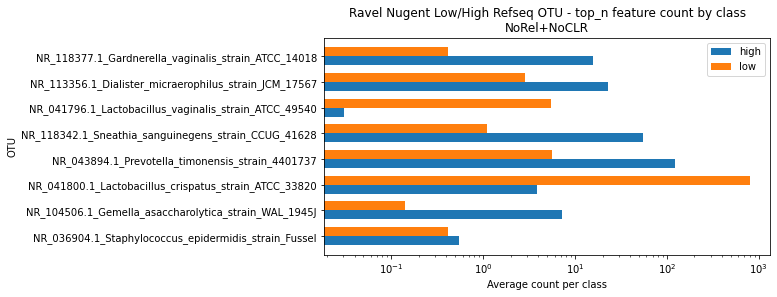

In [16]:
features = data1.features[top_n_features]
filename = f'./plotsv2/ravel_nugent_features_by_class_{experiment}_refseq_otu.png'
utils.plot_features_per_class(data1, fi, title=task+' - top_n feature count by class', subtitle=experiment, classes=('high', 'low'), figsize=(8,4), filename=filename, clean_otu=True)

In [17]:
experiment = 'Rel+NoCLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)

score, fi = run_best_features.run(config, data2, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
          -            0.0117       NR_042847.1_Peptostreptococcus_anaerobius_strain_NCTC_11460_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0179       NR_117556.1_Peptoniphilus_coxii_strain_RMA_16757_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0187       NR_041796.1_Lactobacillus_vaginalis_strain_ATCC_49540_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0263       NR_113091.1_Porphyromonas_uenonis_strain_JCM_13868_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0422       NR_104506.1_Gemella_asaccharolytica_strain_WAL_1945J_16S_ribosomal_RNA_gene__partial_sequence
          -            0.1444       NR_118377.1_Gardnerella_vaginalis_strain_ATCC_14018_16S_ribosomal_RNA_gene__partial_sequence
          -            0.7388       NR_113356.1_Dialister_micraerophilus_strain_JCM_17567_16S_ribosomal_RNA_gene__partial_sequence



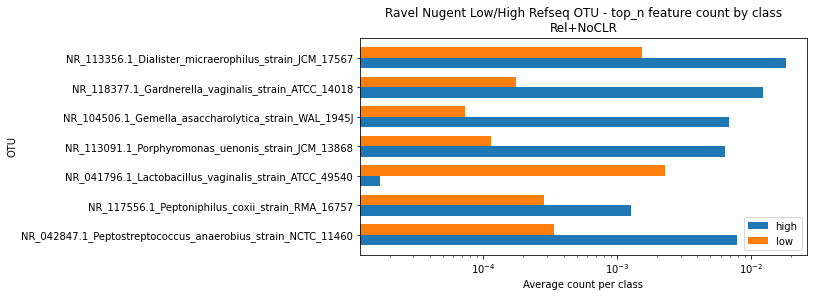

In [18]:
features = data2.features[top_n_features]
filename = f'./plotsv2/ravel_nugent_features_by_class_{experiment}_refseq_otu.png'
utils.plot_features_per_class(data2, fi, title=task+' - top_n feature count by class', subtitle=experiment, classes=('high', 'low'), figsize=(8,4), filename=filename, clean_otu=True)

In [19]:
experiment = 'NoRel+CLR'

# get the features of highest best_n combination
top_n_features = utils.get_top_n_features(stats[experiment], np.argmax(best_n[experiment]) + 1)
top_n_features = sorted(top_n_features)

score, fi = run_best_features.run(config, data3, top_n_features, 1, print_features=True)

         ASV      Coeff/Importance  Taxonomy
          -            0.0101       NR_104506.1_Gemella_asaccharolytica_strain_WAL_1945J_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0117       NR_036982.1_Lactobacillus_iners_strain_DSM_13335_16S_ribosomal_RNA_gene__partial_sequence
          -            0.015        NR_036904.1_Staphylococcus_epidermidis_strain_Fussel_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0213       NR_113091.1_Porphyromonas_uenonis_strain_JCM_13868_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0237       NR_041800.1_Lactobacillus_crispatus_strain_ATCC_33820_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0342       NR_043589.1_Peptostreptococcus_stomatis_strain_W2278_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0414       NR_043894.1_Prevotella_timonensis_strain_4401737_16S_ribosomal_RNA_gene__partial_sequence
          -            0.0686       NR_113096.1_Prevot

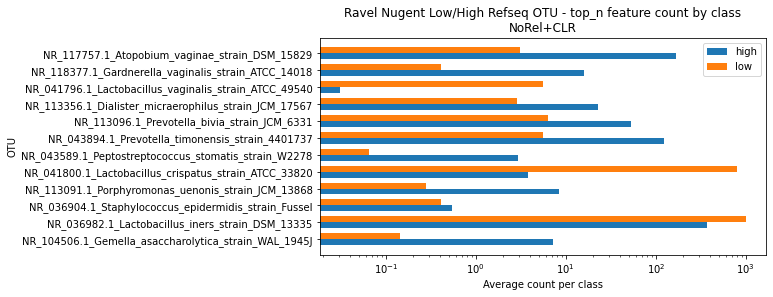

In [20]:
features = data3.features[top_n_features]
filename = f'./plotsv2/ravel_nugent_features_by_class_{experiment}_refseq_otu.png'
utils.plot_features_per_class(data3, fi, title=task+' - top_n feature count by class', subtitle=experiment, classes=('high', 'low'), figsize=(8,4), filename=filename, clean_otu=True)